# Logistic Regression (Manual)

## Import Libraries 

In [15]:
import numpy as np
from numpy import log,dot,e,shape

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split  

## Generate Classification Problem for tests

In [16]:
np.random.seed(1)
X, y = make_classification(n_features = 4,n_classes=2)
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.1)


## Visualize the problem

(100, 4)

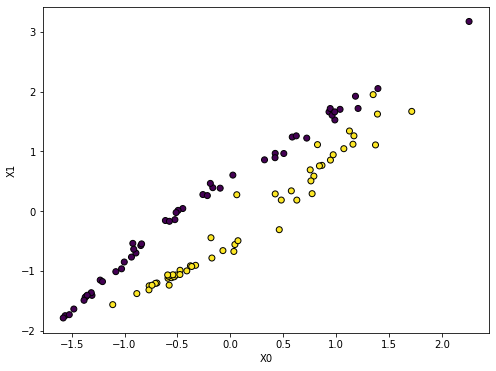

In [17]:
plt.figure(num=None, figsize=(8,6))
plt.scatter(X[:,0], X[:,1], marker='o', c=y, edgecolors='k')
plt.xlabel('X0')
plt.ylabel('X1')
X.shape

In [23]:
def standardize(X_tr):
    for i in range(shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:, i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])
def F1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score

In [31]:
class LogisticRegression:
    def sigmoid(self, z):
        return 1.0 / (1 + np.exp(-z))
    
    def init(self, X):
        weights = np.zeros((shape(X)[1]+1, 1))
        X = np.c_[np.ones((shape(X)[0], 1)), X]
        return weights, X
    
    def fit(self, X, y, alpha=0.001, iter=100):
        params, X = self.init(X)
        def cost_function(theta):
            z = np.dot(X, theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        cost_list = np.zeros(iter,)
        for i in range(iter):
            params = params - alpha * np.dot(X.T, self.sigmoid(np.dot(X, params)) - np.reshape(y,(len(y),1)))
            cost_list[i] = cost_function(params)
        self.params = params
        return cost_list
    
    def predict(self, X):
        z = np.dot(self.init(X)[1], self.params)
        lis = []
        for i in self.sigmoid(z):
            if i > 0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

In [37]:
standardize(X_tr)
standardize(X_te)
obj1 = LogisticRegression()
costs = obj1.fit(X_tr,y_tr)
y_pred = obj1.predict(X_te)
y_train = obj1.predict(X_tr)
#Let's see the f1-score for training and testing data
f1_score_tr = F1_score(y_tr,y_train)
f1_score_te = F1_score(y_te,y_pred)
print(f1_score_tr)
print(f1_score_te)

0.9767441860465117
0.9090909090909091


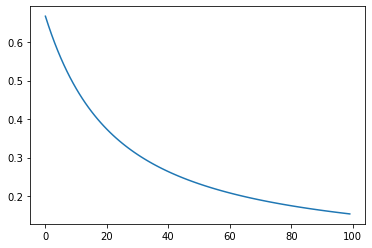

In [38]:
plt.plot(range(len(model)), costs)

In [39]:
y_pred

[1, 0, 1, 1, 1, 0, 0, 0, 0, 1]